In [1]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image, ImageFilter
import pickle
import mglearn
from sklearn.model_selection import train_test_split

In [2]:
X = pickle.load(open("X.pickle","rb"))
X = X / 255.
y = pickle.load(open("y.pickle","rb"))


In [3]:
print(X[0])
print(type(X))
print(type(X[0]))

[[[0.41176471]
  [0.38823529]
  [0.40784314]
  ...
  [0.41960784]
  [0.41568627]
  [0.41176471]]

 [[0.47843137]
  [0.43529412]
  [0.41176471]
  ...
  [0.43921569]
  [0.43921569]
  [0.43529412]]

 [[0.56862745]
  [0.48627451]
  [0.44705882]
  ...
  [0.45490196]
  [0.44313725]
  [0.43921569]]

 ...

 [[0.29411765]
  [0.59607843]
  [0.36862745]
  ...
  [0.1254902 ]
  [0.13333333]
  [0.11764706]]

 [[0.42352941]
  [0.61176471]
  [0.46666667]
  ...
  [0.10588235]
  [0.03529412]
  [0.05882353]]

 [[0.56470588]
  [0.70588235]
  [0.26666667]
  ...
  [0.04313725]
  [0.01568627]
  [0.02352941]]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
from sklearn.neighbors import KNeighborsClassifier
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
X, y, stratify=y, random_state=0)
print(X_train.shape)
print(X_test.shape)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

(612, 64, 64, 1)
(205, 64, 64, 1)
Test set score of 1-nn: 0.65


In [5]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (612, 100)


In [6]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.57


In [9]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 4096)


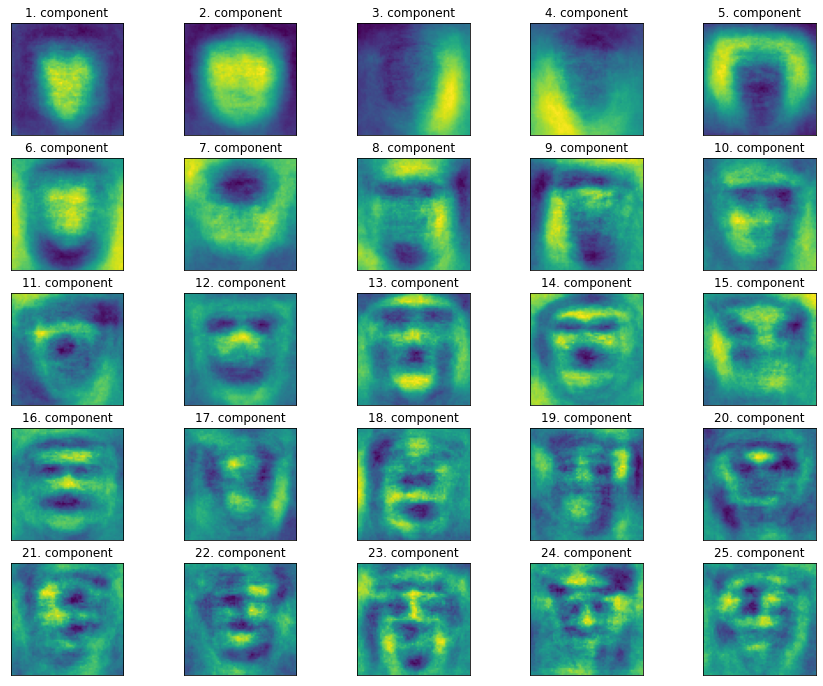

In [15]:
image_shape = (64,64)
fix, axes = plt.subplots(5, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))